# Preparing Data

For this project, I am using the dataset from `Kaggle's` Dog vs Cat competition. I downloaded the zip file extracted it in my project's root directory and extracted the train.zip. Kaggle's train data set contains 25000 images which is difficult to process, hence I have randomly selected 2000 (1000 cats, 1000 dogs) images for training. Also, deleted the test.zip  as I am creating test data set also from their training data set.

## Create Folders to hold different data sets

In [13]:
# create data
import os
import glob 
import random 
import shutil


project_path = 'D:\\deep-learning\\learning-keras\\cat-vs-dog'
os.chdir(project_path)
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    
    for c in random.sample(glob.glob('dog*'), 1000):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 1000):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 200):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 200):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'test/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'test/cat')
else:
    print('Seems like data is already set up. Skipping!')

Seems like data is already set up. Skipping!


In [14]:
os.chdir(project_path)
train_path = 'train'
test_path = 'test'
validation_path = 'valid'

# Building a model

In [35]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [31]:
image_size = (224, 224)

print('loading images from training dataset')
train_batches = ImageDataGenerator(preprocessing_function=preprocess_input)\
    .flow_from_directory(batch_size=10, directory=train_path, target_size=image_size, classes=['cat', 'dog'])
print('completed loading images from training dataset')

print('loading vlidation images')
validation_batches = ImageDataGenerator(preprocessing_function=preprocess_input)\
    .flow_from_directory(batch_size=10, directory=validation_path, target_size=image_size, classes=['cat', 'dog'])
print('completed loading validation images')

print('loading images from test dataset')
test_batches = ImageDataGenerator(preprocessing_function=preprocess_input)\
    .flow_from_directory(batch_size=10, directory=test_path, target_size=image_size, classes=['cat', 'dog'], shuffle=False)
print('completed loading images from test dataset')

loading images from training dataset
Found 2000 images belonging to 2 classes.
completed loading images from training dataset
loading vlidation images
Found 400 images belonging to 2 classes.
completed loading validation images
loading images from test dataset
Found 200 images belonging to 2 classes.
completed loading images from test dataset


In [51]:
model = Sequential()

# first hidden layer
# padding =  same means we will add 0 paddings to maintain the size of output same as the size of input after convolving  
# size is 244 * 244, 3 is for rgb
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))

model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(units=2, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [53]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
# we do not pass y here because the generators usually contain y value in them
model.fit(x=train_batches, validation_data=validation_batches, epochs=10, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 200 steps, validate for 40 steps
Epoch 1/10
200/200 - 84s - loss: 20.6400 - accuracy: 0.5235 - val_loss: 0.6961 - val_accuracy: 0.5475
Epoch 2/10
200/200 - 73s - loss: 0.6352 - accuracy: 0.6415 - val_loss: 0.7089 - val_accuracy: 0.5750
Epoch 3/10
200/200 - 74s - loss: 0.5281 - accuracy: 0.7515 - val_loss: 0.7042 - val_accuracy: 0.5850
Epoch 4/10
200/200 - 74s - loss: 0.4290 - accuracy: 0.8470 - val_loss: 0.9835 - val_accuracy: 0.6000
Epoch 5/10
200/200 - 78s - loss: 0.1622 - accuracy: 0.9465 - val_loss: 1.1644 - val_accuracy: 0.6075
Epoch 6/10
200/200 - 73s - loss: 0.1153 - accuracy: 0.9630 - val_loss: 1.2981 - val_accuracy: 0.5700
Epoch 7/10
200/200 - 73s - loss: 0.1088 - accuracy: 0.9695 - val_loss: 1.6385 - val_accuracy: 0.5975
Epoch 8/10
200/200 - 74s - loss: 0.1385 - accuracy: 0.9555 - val_loss: 1.4636 - val_accuracy: 0.6075
Epoch 9/10
200/200 - 83s - loss: 0.0416 - accuracy: 0.9850 - val_loss: 2.0234 - val_accuracy: 0.60

# Prediction

In [76]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [70]:
predictions = model.predict(x=test_batches, verbose=0)

In [71]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [72]:
rounded_predictions

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1], dtype=int64)

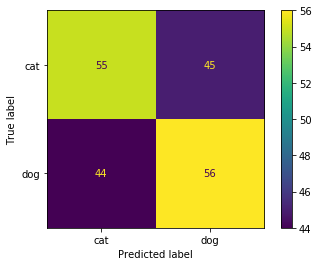

In [78]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=rounded_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cat', 'dog'])
display = display.plot()